In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [7]:
data = pd.read_csv('AmesHousing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df = data.loc[((data['Lot Frontage']<=150) & (data['Lot Area']<=20000))]
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2924,923250060,20,RL,80.0,17400,Pave,NaN,Reg,Low,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
X = df[['Lot Frontage','Lot Area']]
y = df['SalePrice']

In [5]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(X,y)

DecisionTreeRegressor(max_depth=3)

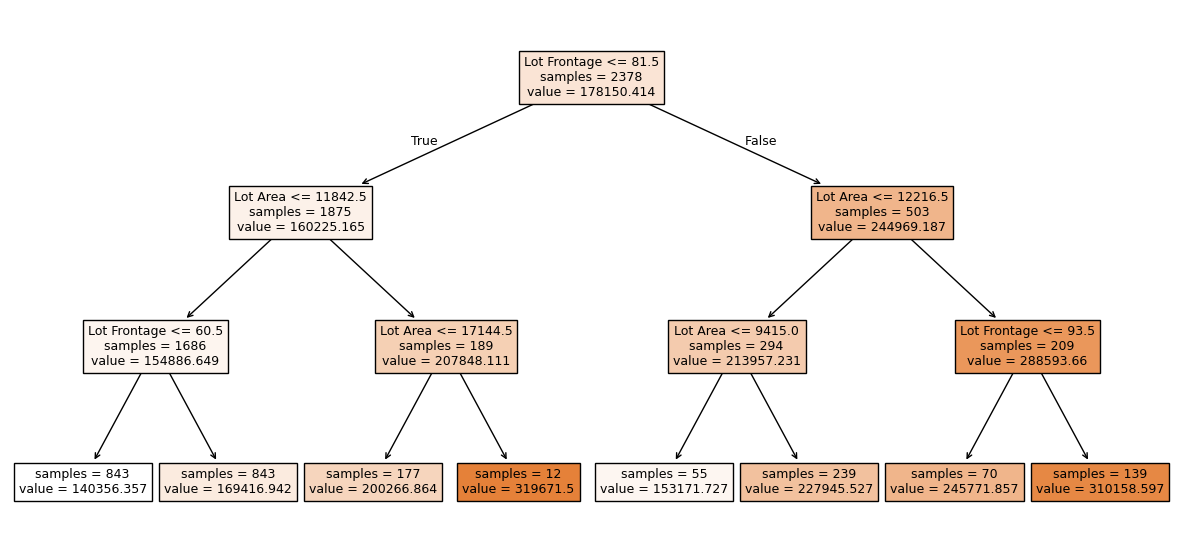

In [6]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    model, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);              

/home/roman/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


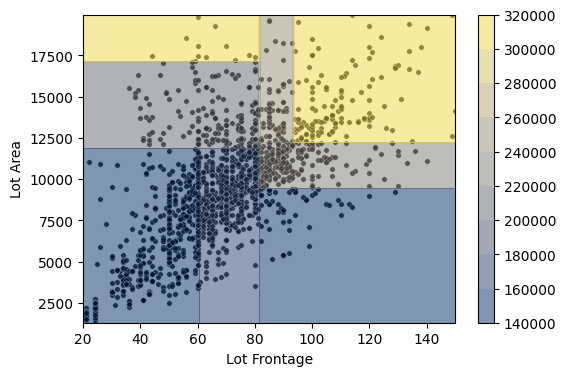

In [7]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (6, 4))
plot_decision_bound_regression(X, y,model, fig)

In [8]:

predict_y = model.predict(X)
len(np.unique(predict_y))

8

In [9]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
x = data['age']
y = data['loan']

In [ ]:
x = x.sort_values().drop_duplicates()
x

0    17
2    18
3    20
7    25
8    29
9    31
4    38
5    49
6    55
1    64
Name: age, dtype: int64

In [ ]:
x_roll_mean = x.rolling(2).mean()
print(x_roll_mean.values)

[ nan 17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


In [12]:
x_roll_mean = x_roll_mean.dropna()
print(x_roll_mean.values)

[17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


In [13]:
y = y[x_roll_mean.index]
y_roll_mean = y.diff()
candidates = x_roll_mean[y_roll_mean != 0]
print(candidates.values)

[17.5 19.  22.5 30.  34.5 43.5]


In [14]:
ames_data = pd.read_csv('AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)

In [ ]:
ames_sample

,Lot Frontage,Lot Area,SalePrice
0,60.0,11040,108000
1,96.0,10628,193000
2,68.0,9717,142125
3,50.0,9060,150909
4,92.0,9215,204500
5,80.0,10386,305900
6,60.0,7350,139000
7,72.0,8640,229800
8,56.0,6956,97900
9,70.0,12886,175000


In [ ]:
lot_ames_sample = ames_sample['Lot Frontage'].sort_values().drop_duplicates()
lot_ames_sample

3      50.0
8      56.0
0      60.0
14     62.0
2      68.0
9      70.0
7      72.0
5      80.0
4      92.0
1      96.0
12    106.0
Name: Lot Frontage, dtype: float64

In [ ]:
lot_ames_sample.rolling(2).mean().dropna()

8      53.0
0      58.0
14     61.0
2      65.0
9      69.0
7      71.0
5      76.0
4      86.0
1      94.0
12    101.0
Name: Lot Frontage, dtype: float64

In [18]:
y = ames_sample['SalePrice']
y

0     108000
1     193000
2     142125
3     150909
4     204500
5     305900
6     139000
7     229800
8      97900
9     175000
10     99900
11    207000
12    312500
13    144100
14    176000
Name: SalePrice, dtype: int64

In [19]:
ames_sample['Lot Area'].sort_values().drop_duplicates().rolling(2).mean().dropna()

8      5508.0
6      7153.0
14     7425.0
13     7949.0
12     8405.5
7      8526.5
3      8850.0
4      9137.5
2      9466.0
5     10051.5
1     10507.0
0     10834.0
11    11365.0
9     12288.0
Name: Lot Area, dtype: float64

In [20]:
ames_data = pd.read_csv('AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)

In [ ]:
ames_sample['SalePrice']

0     108000
1     193000
2     142125
3     150909
4     204500
5     305900
6     139000
7     229800
8      97900
9     175000
10     99900
11    207000
12    312500
13    144100
14    176000
Name: SalePrice, dtype: int64

In [22]:
ind = ames_sample['Lot Frontage'].sort_values().drop_duplicates().index

In [23]:
ames_sample['Lot Frontage'].sort_values().drop_duplicates().rolling(2).mean().dropna()

8      53.0
0      58.0
14     61.0
2      65.0
9      69.0
7      71.0
5      76.0
4      86.0
1      94.0
12    101.0
Name: Lot Frontage, dtype: float64

In [ ]:
ames_sample['SalePrice'][ind]

3     150909
8      97900
0     108000
14    176000
2     142125
9     175000
7     229800
5     305900
4     204500
1     193000
12    312500
Name: SalePrice, dtype: int64

In [25]:
x = pd.DataFrame({'a':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]})
y = [1,1.2,1.4,1.1,1,5.5,6.1,6.7,6.4,6,6,3,3.2,3.1,3]



In [26]:
(1+1.2+1.4+1.1+1+5.5+6.1+6.7+6.4+6+6+3+3.2+3.1+3)/15

3.646666666666667

In [27]:
(1/10)*((5.5-4.9)**2+(6.1-4.9)**2+(6.7-4.9)**2+(6.4-4.9)**2+(6-4.9)**2+(6-4.9)**2+(3-4.9)**2+(3.2-4.9)**2+(3.1-4.9)**2+(3-4.9)**2)

2.3060000000000005

In [28]:
def squared_error(y):
    y_mean = y.mean()
    return ((y-y_mean)**2).mean()

In [29]:
from math import log2
- ((25/37)*log2(25/37) + (12/37)*log2(12/37))

0.9090221560878149

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection 

In [31]:
voice_data = pd.read_csv('voice_gender.csv')
display(voice_data.head())
voice_data.shape

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


(3168, 21)

In [32]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
voice_data.isna().sum().sum()

np.int64(0)

In [34]:
df = voice_data.copy()
df['label'] = df['label'].apply(lambda x: 1 if x == 'male' else 0)

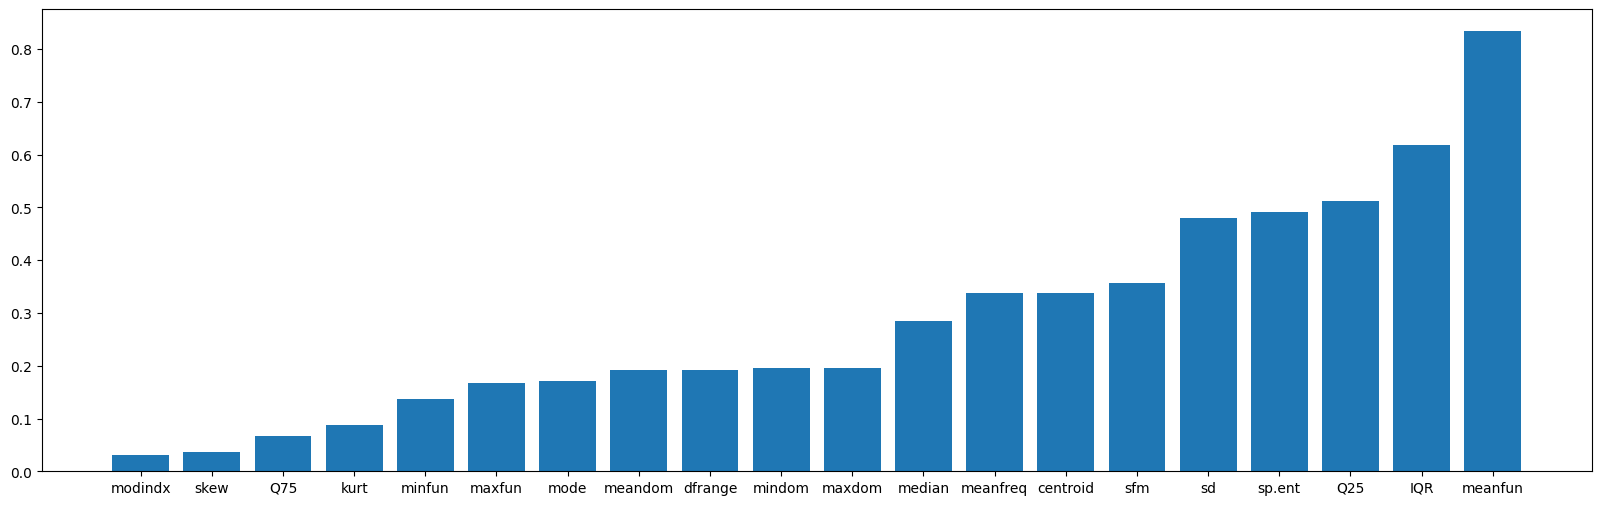

In [35]:
mask1 = df.corr()['label'].abs().sort_values().drop(['label'])

fig,ax = plt.subplots(figsize = (20,6))
ax.bar(mask1.index,height=mask1.values);

In [36]:
# import seaborn as sns
# sns.pairplot(df)

label
male      1584
female    1584
Name: count, dtype: int64


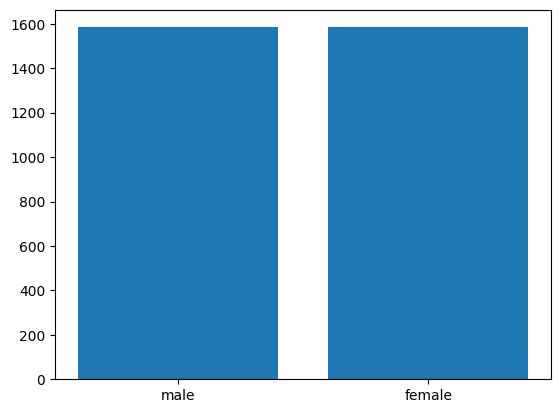

In [37]:
plt.bar(voice_data['label'].value_counts().index,voice_data['label'].value_counts());
print(voice_data['label'].value_counts())

In [38]:
X = voice_data.drop(['label'],axis=1)
y = voice_data['label']
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,stratify=y,random_state=42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(2534, 20)
(634, 20)
label
male      0.5
female    0.5
Name: proportion, dtype: float64
label
female    0.5
male      0.5
Name: proportion, dtype: float64


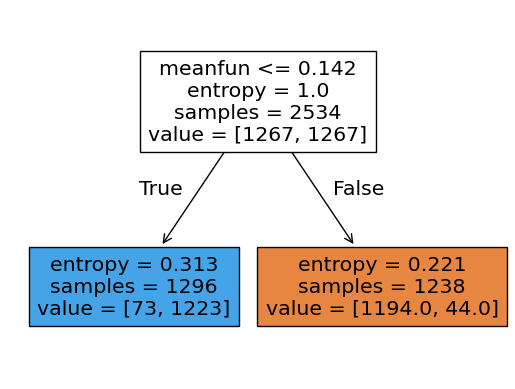

In [39]:
model = DecisionTreeClassifier(max_depth=1,criterion='entropy')
model.fit(X_train,y_train)

tree.plot_tree(decision_tree=model,
               max_depth=1,
               feature_names=X_train.columns,
               filled=True,
               impurity=True);

In [40]:
predict_y = model.predict(X_test)
print(round(metrics.accuracy_score(y_test,predict_y),3))

0.956


In [41]:
print(metrics.classification_report(y_test,predict_y))

              precision    recall  f1-score   support

      female       0.96      0.95      0.96       317
        male       0.95      0.97      0.96       317

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [42]:
X_train.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

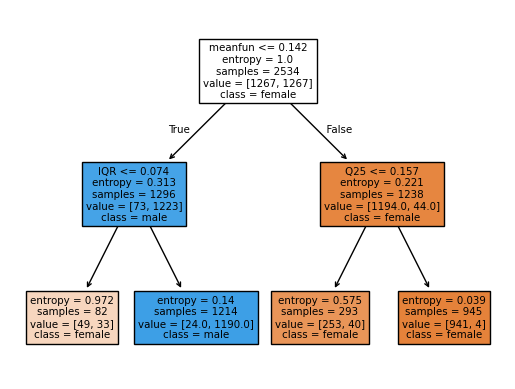

In [43]:
model_2 = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model_2.fit(X_train,y_train)

tree.plot_tree(decision_tree=model_2,
               max_depth=2,
               feature_names=X_train.columns,
               impurity=True,
               filled=True,
               class_names=model.classes_);

In [44]:
predict_y2 = model_2.predict(X_test)
print(round(metrics.accuracy_score(y_test,predict_y2),3))

0.962


In [45]:
print(metrics.classification_report(y_test,predict_y2))

              precision    recall  f1-score   support

      female       0.95      0.98      0.96       317
        male       0.98      0.95      0.96       317

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [46]:
model_all = DecisionTreeClassifier(random_state=0,criterion='entropy')
model_all.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
model_all.get_depth()

12

In [48]:
model_all.get_n_leaves()

np.int64(54)

In [49]:
predict_yall_train = model_all.predict(X_train)
print(round(metrics.accuracy_score(y_train,predict_yall_train),3))

1.0


In [50]:
predict_yall = model_all.predict(X_test)
print(round(metrics.accuracy_score(y_test,predict_yall),3))

0.973


In [51]:
print(metrics.classification_report(y_test,predict_yall))

              precision    recall  f1-score   support

      female       0.98      0.97      0.97       317
        male       0.97      0.98      0.97       317

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [52]:
Grid = {
    'criterion' :['gini','entropy'],
    'max_depth' :[4,5,6,7,8,9,10],
    'min_samples_split' :[3,4,5,10]
}
sv = model_selection.StratifiedKFold(n_splits=5)
GS = model_selection.GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=Grid,
    cv=sv,
    n_jobs=-1)
GS.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]})

In [54]:
mod = GS.best_params_

In [55]:
mod.predict(X_train)

AttributeError: 'dict' object has no attribute 'predict'

In [56]:
model = GS
model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]})

In [57]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

metrics.accuracy_score(y_train,y_predict_train)

0.9956590370955012

In [58]:
metrics.accuracy_score(y_test,y_predict_test)

0.9700315457413249